In [4]:
!pip install -q openpyxl

You should consider upgrading via the 'C:\Users\Lidor\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler # Standardizing the Data
from sklearn.decomposition import PCA # PCA calculation
import matplotlib.pyplot as plt

In [2]:
# Dataset is big, so we will download it via code
# The alibaba cluster trace link was changed and they didnt updated it so I had to find an alternative
dataset_link = "https://raw.githubusercontent.com/ansjin/blogs/master/Dimensionality%20Reduction/m_1.xlsx"
# Original data came from here: https://github.com/alibaba/clusterdata/tree/master/cluster-trace-v2018

In [6]:
df = pd.read_excel(dataset_link, index_col = 0)
df.drop('machine_id', axis = 1, inplace = True)
df = df.fillna(0)
df.head()

,cpu_util_percent,mem_util_percent,mem_gps,mkpi,net_in,net_out,disk_io_percent
timestamp,,,,,,,
2011-05-01 12:00:10,13,84,0.0,0.0,32.46,23.09,1
2011-05-01 12:00:20,10,84,0.0,0.0,32.46,23.09,1
2011-05-01 12:00:30,11,84,0.0,0.0,32.46,23.09,1
2011-05-01 12:00:40,12,84,0.0,0.0,32.46,23.09,1
2011-05-01 12:00:50,12,84,0.0,0.0,32.46,23.09,1


In [7]:
X = df.values
sc = StandardScaler()
X_std = sc.fit_transform(X)

In [8]:
pca = PCA()
X_pca = pca.fit(X_std)

In [15]:
pca.explained_variance_ratio_
# pca.components_
# pca.explained_variance_

array([4.92506976e-01, 2.94154209e-01, 1.15627304e-01, 9.76441180e-02,
       6.73930028e-05, 2.22604529e-34, 4.65806411e-36])

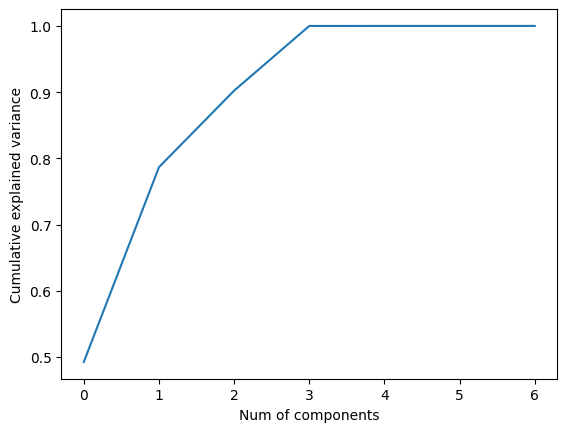

In [17]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Num of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [18]:
num_components = 4
pca = PCA(num_components)  
X_pca = pca.fit_transform(X_std)

In [19]:
pd.DataFrame(pca.components_, columns = df.columns)

,cpu_util_percent,mem_util_percent,mem_gps,mkpi,net_in,net_out,disk_io_percent
0,-0.118573,-0.478128,0.000000e+00,1.387779e-17,-0.607107,-0.606225,-0.145762
1,0.699157,-0.013101,-0.000000e+00,-0.000000e+00,-0.143500,-0.147322,0.684626
2,-0.203818,-0.818723,-6.938894e-17,1.110223e-16,0.302247,0.305581,0.321585
3,-0.674959,0.317664,2.775558e-17,-2.775558e-17,-0.136464,-0.135183,0.637670


In [20]:
n_pcs = pca.n_components_
# Retrieve the index of the most important feature of each component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = df.columns
# Retrieve the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

In [21]:
most_important_names

['net_in', 'cpu_util_percent', 'mem_util_percent', 'cpu_util_percent']